# day 235

# importing the essentials

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import requests
import os
import zipfile
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
from pathlib import Path
import matplotlib.image as image
from PIL import Image
import torchvision

In [ ]:
# checking the version of our pytorch
torch.__version__

'2.1.0+cu118'

# Get Data:

* our data comprises of more than 100k images of food with 101 classes of food.
* But we want to work with only 3 classes and 10% of total data so that our experiment is faster.
* remember this idea: experiment small, fail fast to get better and better.

In [ ]:
# make the directory:

''' we make the directory explicitly  in pytorch so that we do not run into any errors'''
data_path = Path('data')
image_path = data_path /  'pizza_steak_sushi' # don't put + here

if image_path.is_dir():
  print('data folder is already created for the images to be stored in')
else:
  print('creating the data folder')
  image_path.mkdir(parents=True,exist_ok=True)

# download and store the pizza_steak_sushi file in data/pizza_steak_sushi
with open(data_path/'pizza_steak_sushi.zip','wb') as f:
  print('Downloading the data')
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip').content
  f.write(request)

# unzip the images with read only permission
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip:
  zip.extractall(image_path)
  zip.close()


creating the data folder


# Tangent advise: if you have 8 days to prepare a machine learning model spend the first 7 days preparing the dataset

# data exploration, analysis and freethrows

In [ ]:
os.listdir('data/pizza_steak_sushi/train')

['pizza', 'steak', 'sushi']

In [ ]:
for dirpath,dirnames,filenames in os.walk('data/pizza_steak_sushi/test'):
  print('There are {} directories and {} images in {} '.format(len(dirnames),len(filenames),dirpath))

There are 3 directories in 0 images in data/pizza_steak_sushi/test 
There are 0 directories in 25 images in data/pizza_steak_sushi/test/pizza 
There are 0 directories in 19 images in data/pizza_steak_sushi/test/steak 
There are 0 directories in 31 images in data/pizza_steak_sushi/test/sushi 


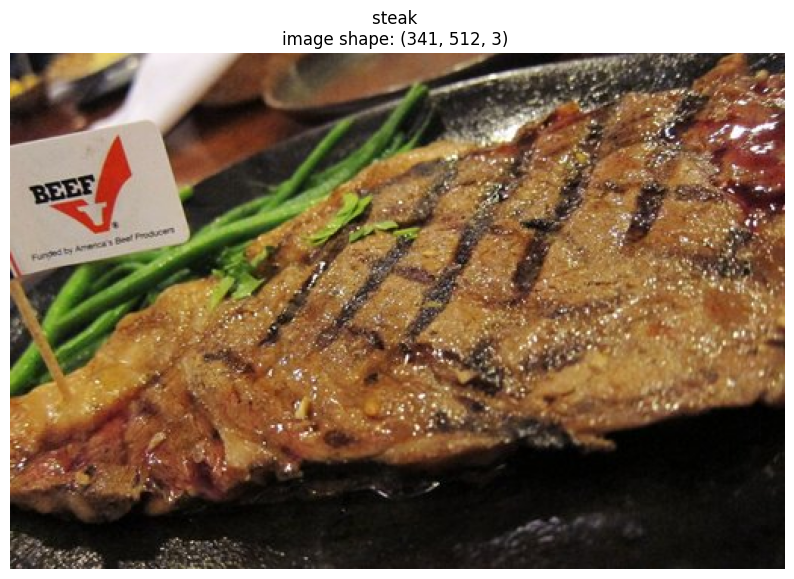

In [ ]:
# viewing the image
dir = 'data/pizza_steak_sushi/train'

random_class = np.random.choice(os.listdir(dir))

random_image = np.random.choice(os.listdir(dir + '/' + random_class))

full_image_path = dir + '/' + random_class + '/' + random_image

# visualize the image
plt.figure(figsize=(10,7))
image_numbers = image.imread(full_image_path)
plt.imshow(image_numbers)
plt.title('{} \nimage shape: {} '.format(random_class,image_numbers.shape))

plt.axis('off')
plt.show()



class name: sushi
Image Heigh: 382
Image Width: 512


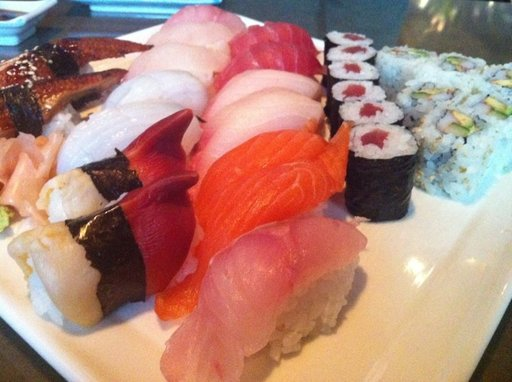

In [ ]:
# instructor's new method of getting the same thing done!( the python style)

""" procedure:
 1. access all the files from image_path path using glob function
 2. randomly choose an image
 3. show the image using PIL.Image.open(random_image_path)
 4. get the class of the image using random_image_path.parent.stem
"""

from PIL import Image

# np.random.seed(42)
random_image_path = np.random.choice(list(image_path.glob('*/*/*.jpg')))

img = Image.open(random_image_path)

# printing the meta data of the image:
print('class name: {}'.format(random_image_path.parent.stem))
print('Image Heigh: {}'.format(img.height))
print('Image Width: {}'.format(img.width))
img

In [ ]:
list(image_path.glob('*/*/*.jpg'))

[PosixPath('data/pizza_steak_sushi/train/pizza/2493954.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2426686.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2576168.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2760984.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1524655.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/928670.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2702825.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3530210.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3338774.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2821048.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/5764.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2924941.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/68684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2428085.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2992084.jpg'),
 PosixPath('da

In [ ]:
np.random.choice(list(image_path.glob('*/*/*.jpg')))

PosixPath('data/pizza_steak_sushi/train/sushi/390178.jpg')

In [ ]:
np.random.choice(list(image_path.glob('*/*/*.jpg'))).parent.stem

'pizza'

# transforming our images with torchvision.transforms: (data augmentation).

* data augmentation, data transformation, data preprocessing are all same.

In [ ]:
data_augmentation = torchvision.transforms.Compose([
    # resize the image
    torchvision.transforms.Resize(size=(64,64)),

    # flip it horizontally randomly with a probability of 50%
    torchvision.transforms.RandomHorizontalFlip(p=0.5),

    # cast the images to tensor
    torchvision.transforms.ToTensor()

])

In [ ]:
data_augmentation(img)

tensor([[[0.2824, 0.3137, 0.5216,  ..., 0.8392, 0.8471, 0.8118],
         [0.3333, 0.3490, 0.4392,  ..., 0.8314, 0.7765, 0.6745],
         [0.3412, 0.3059, 0.3412,  ..., 0.6471, 0.4471, 0.3686],
         ...,
         [0.2196, 0.2314, 0.2314,  ..., 0.3451, 0.3373, 0.3255],
         [0.2157, 0.2353, 0.2471,  ..., 0.3294, 0.3333, 0.3216],
         [0.2118, 0.2235, 0.2471,  ..., 0.3059, 0.3137, 0.3137]],

        [[0.3176, 0.3569, 0.5686,  ..., 0.9176, 0.9294, 0.9333],
         [0.3961, 0.4196, 0.4902,  ..., 0.9059, 0.8353, 0.7373],
         [0.4196, 0.3843, 0.3961,  ..., 0.7216, 0.5137, 0.3804],
         ...,
         [0.1647, 0.1765, 0.1765,  ..., 0.2745, 0.2588, 0.2510],
         [0.1608, 0.1647, 0.1686,  ..., 0.2549, 0.2431, 0.2471],
         [0.1490, 0.1529, 0.1647,  ..., 0.2275, 0.2275, 0.2314]],

        [[0.3412, 0.3686, 0.5333,  ..., 0.9176, 0.9294, 0.9451],
         [0.4314, 0.4235, 0.4824,  ..., 0.8941, 0.8471, 0.7725],
         [0.4392, 0.3843, 0.4000,  ..., 0.7569, 0.6039, 0.

# rewrite the whole above code here:

# day 240,day 242

# importing the essentials

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import os
import requests
import zipfile
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from pathlib import Path
from typing import List,Tuple,Dict
import pathlib

# downloading the data:

# goals:
1. make a directory to store the zip
2. make another directory to store the contents of the zipfile.
3. download the zipfile
4. unzip the zipfile and extract it to right location(image_path)

In [ ]:
# make the directory to store the zip
data_path = Path('data')

# make another directory to store the contents of the zipfile:
image_path = data_path / 'pizza_steak_sushi'
image_path.mkdir(parents=True,exist_ok=True)

# download the zipfile:
with open(data_path / 'pizza_steak_sushi.zip','wb') as f:
  print('Downloading the zipfile')
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip').content
  f.write(request)

# unzip the zipfile and extract the contents to image_path
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip:
  zip.extractall(image_path)
  zip.close()


# randomly view an image using PIL.Image

class_name: sushi
image height: 512
image width: 512


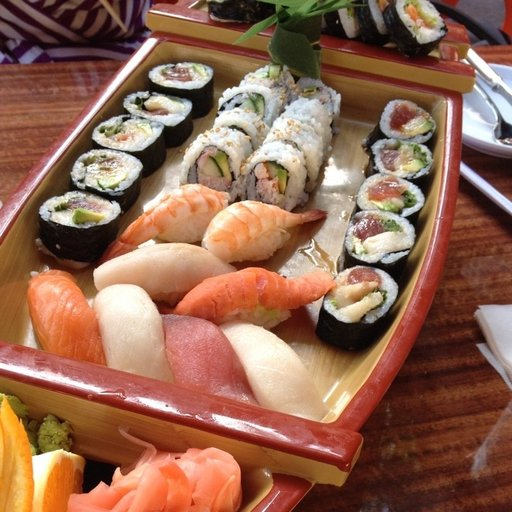

In [ ]:
random_image_path = np.random.choice(list(image_path.glob('*/*/*.jpg')))

img = Image.open(random_image_path)

print('class_name: {}'.format(random_image_path.parent.stem))
print('image height: {}'.format(img.height))
print('image width: {}'.format(img.width))
img

# data augmentation

# goals:
1. resize the image
2. do HorizontalRandomFlip
3. recast the image to tensor

In [ ]:
data_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(64,64)),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.ToTensor()


    ])

In [ ]:
data_augmentation(img)

tensor([[[0.4784, 0.3961, 0.4000,  ..., 0.4314, 0.2745, 0.2392],
         [0.4863, 0.3882, 0.3843,  ..., 0.2471, 0.2824, 0.4275],
         [0.5333, 0.4078, 0.3647,  ..., 0.2980, 0.3451, 0.3255],
         ...,
         [0.4314, 0.4157, 0.3608,  ..., 0.9529, 0.8745, 0.8431],
         [0.3725, 0.3961, 0.3843,  ..., 0.9647, 0.8784, 0.8431],
         [0.2745, 0.2863, 0.2980,  ..., 0.9647, 0.8863, 0.8471]],

        [[0.1608, 0.3176, 0.3529,  ..., 0.3216, 0.1569, 0.1216],
         [0.1725, 0.3176, 0.3333,  ..., 0.1216, 0.1686, 0.3373],
         [0.1647, 0.2980, 0.3216,  ..., 0.1922, 0.2510, 0.2353],
         ...,
         [0.1961, 0.1922, 0.1569,  ..., 0.7333, 0.6000, 0.5333],
         [0.1608, 0.1765, 0.1647,  ..., 0.7451, 0.6196, 0.5490],
         [0.1059, 0.1059, 0.1098,  ..., 0.7255, 0.6275, 0.5529]],

        [[0.1373, 0.3569, 0.4000,  ..., 0.3098, 0.1608, 0.1373],
         [0.1529, 0.3490, 0.3725,  ..., 0.1490, 0.2000, 0.3451],
         [0.1294, 0.3216, 0.3686,  ..., 0.2314, 0.2745, 0.

# visualizing a series of images after being through augmentations

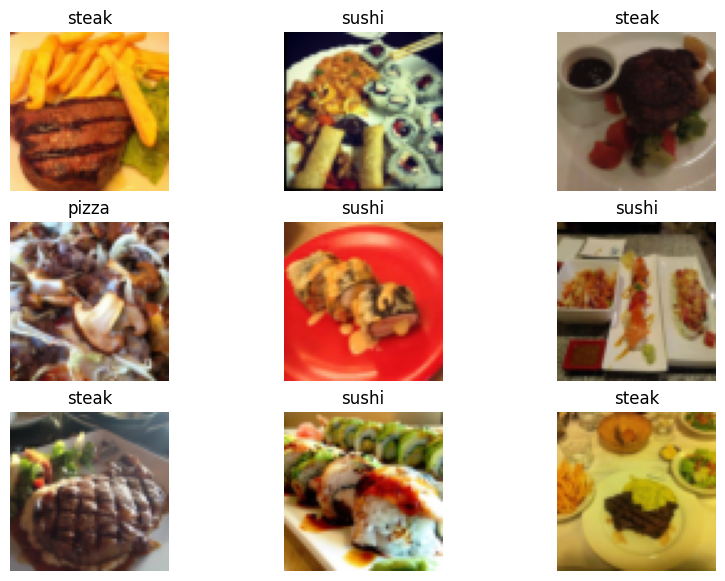

In [ ]:
rows = 3
cols = 3

random_images = np.random.choice(list(image_path.glob('*/*/*.jpg')),rows*cols)

plt.figure(figsize=(10,7))
for i in range(rows*cols):
  img = Image.open(random_images[i])
  img = data_augmentation(img).permute(1,2,0) # permute changes the axes position
  plt.subplot(rows,cols,i+1)
  plt.imshow(img) # c
  plt.axis('off')
  plt.title(random_images[i].parent.stem)
plt.show()

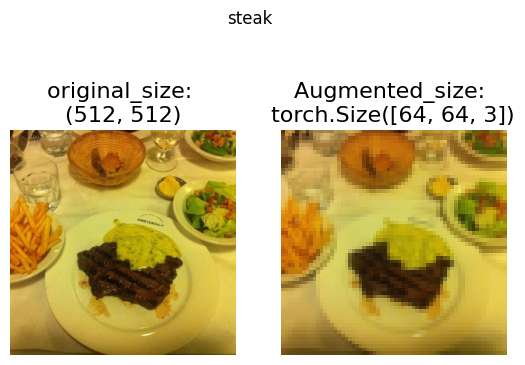

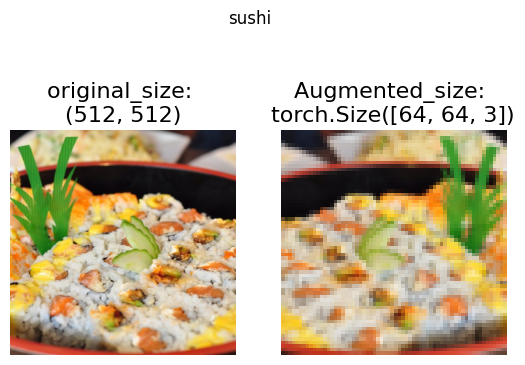

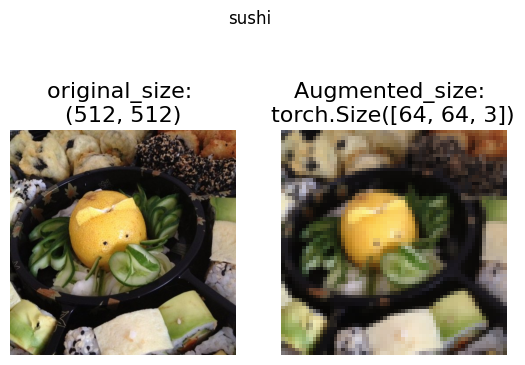

In [ ]:
# comparing original image with augmented images:

n = 3 # n stands for number of images.

random_images = np.random.choice(list(image_path.glob('*/*/*')),n)

for i in range(n):
  fig,ax = plt.subplots(1,2)

  # plotting the unaugmented original images
  original_img = Image.open(random_images[i])
  ax[0].imshow(original_img)
  ax[0].axis('off')
  ax[0].set_title('original_size: \n{}'.format(original_img.size),fontsize=16)

  # plotting the augmented images:
  augmented_img = data_augmentation(Image.open(random_images[i])).permute(1,2,0) # making the color channels go last
  ax[1].imshow(augmented_img)
  ax[1].axis('off')
  ax[1].set_title('Augmented_size: \n{}'.format(augmented_img.shape),fontsize=16)

  plt.suptitle(random_images[i].parent.stem)

plt.show()




# exploration,analysis and freethrows

In [ ]:
augmented_img.shape

torch.Size([64, 64, 3])

In [ ]:
original_img.shape

AttributeError: ignored

In [ ]:
original_img.size

(512, 384)

In [ ]:
data_augmentation(img).shape

torch.Size([3, 64, 64])

In [ ]:
# changes the axes position
data_augmentation(img).permute(1,2,0).shape

torch.Size([64, 64, 3])

In [ ]:
random_images[0].parent.stem

'sushi'

In [ ]:
np.random.choice(range(1,100),5)

array([95, 35, 96, 32, 33])

In [ ]:
random_images

array([PosixPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
       PosixPath('data/pizza_steak_sushi/train/pizza/29417.jpg'),
       PosixPath('data/pizza_steak_sushi/train/pizza/2291093.jpg'),
       PosixPath('data/pizza_steak_sushi/train/steak/830007.jpg'),
       PosixPath('data/pizza_steak_sushi/train/pizza/1633289.jpg')],
      dtype=object)

In [ ]:
random_images[0]

PosixPath('data/pizza_steak_sushi/test/pizza/1503858.jpg')

# map the augmentation func to all the images of the train and test:

# goal:
0. set train_dir and test_dir
1. pass the images and labels to torchvision.datasets.ImageFolder


In [ ]:
train_dir = 'data/pizza_steak_sushi/train'
test_dir = 'data/pizza_steak_sushi/test'

train_data = torchvision.datasets.ImageFolder(train_dir,
                                              transform=data_augmentation,
                                              target_transform=None)

test_data = torchvision.datasets.ImageFolder(test_dir,
                                            transform=data_augmentation,
                                            target_transform=None)

# get the class_names

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

# visualizing the image after transformation

# goals:
1. print the shape of the original image
2. print the shape of the permuted image after the channel is shifted to 2 nd axis
3. plot the permuted image with its corresponding class name.
4. print the dtype of the image
5. print the dtype of the label.

dtype of the image is: torch.float32
dtype of the label is: <class 'int'>
shape of the original is: torch.Size([3, 64, 64])
shape of the permuted image is: torch.Size([64, 64, 3])


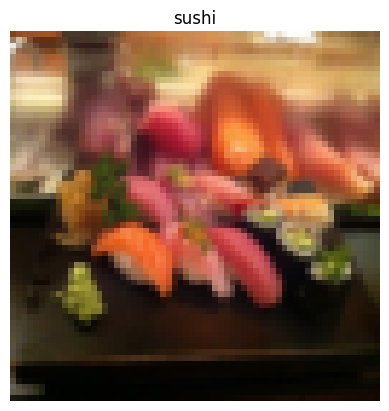

In [ ]:
random_index = np.random.randint(len(train_data))

image,label = train_data[random_index]

permuted_image = image.permute(1,2,0)

print('dtype of the image is: {}'.format(image.dtype))
print('dtype of the label is: {}'.format(type(label)))
print('shape of the original is: {}'.format(image.shape))
print('shape of the permuted image is: {}'.format(permuted_image.shape))

# plot the image with label
plt.imshow(permuted_image)
plt.title(class_names[label])
plt.axis('off')
plt.show()

# batchify the train_data and test_data

# goals:
1. use torch.utils.data.DataLoader to batchify the data
2. find out how many cpu units are available with colab for crunching our data and print it

In [ ]:
# print the available cpu units
print('Available CPU units for crunching our data are: {}'.format(os.cpu_count()))

# batchifying the train_data
train_dataloader = torch.utils.data.DataLoader(train_data,
                                               batch_size=8,
                                               shuffle=True,
                                               num_workers=os.cpu_count()) # num_workers set the # of cpu to use

# batchifying our test data
test_dataloader = torch.utils.data.DataLoader(test_data,
                                              batch_size=8,
                                              shuffle=False,
                                              num_workers=os.cpu_count())

Available CPU units for crunching our data are: 2


In [ ]:
print('Train data has {} batches'.format(len(train_dataloader)))
print('Test data has {} batches'.format(len(test_dataloader)))

Train data has 29 batches
Test data has 10 batches


# exploration,analysis and freethrows

In [ ]:
image,label = next(iter(train_dataloader))

image.shape,label.shape

(torch.Size([8, 3, 64, 64]), torch.Size([8]))

# create your own function to do what ImageFolder did to convert the images into train_data and test_data in tensor format

# goals: make the function to do the following:
1. it should load the images from the directory.
2. it should return a list of correct class names


# pros:
* more control !!!, more customization !!!

# cons:
* it may fail and cause a lot of errors.
* time consuming.
* have to write a lot of codes.

# first lets make our custom function to return class names found in any given directory

# goals:
1. use os.scandir to get the class_names and return it using a function.(this is our custom style but the important thing to note here is it still relies on inbuilt os library. it is not truly fully our custom design).


In [ ]:
train_dir = 'data/pizza_steak_sushi/train'
test_dir = 'data/pizza_steak_sushi/test'

In [ ]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:

  # capturing the class_names using os library
  class_names = sorted([dir.name for dir in list(os.scandir(directory)) if dir.is_dir()])

  # if class_names are empty raise FileNotFoundError with custom message attached.
  if not class_names:
    raise FileNotFoundError("Please check the {} path, the path doesn't seem to have any classes".format(directory))

  # make a dictionary out of the class_names with values being their associated index number:
  class_dic = {class_name:idx for idx,class_name in enumerate(class_names)}

  return class_names,class_dic

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# explanation,analysis and freethrows

In [ ]:
train_dir

'data/pizza_steak_sushi/train'

In [ ]:
list(os.scandir(train_dir))

[<DirEntry 'steak'>, <DirEntry 'pizza'>, <DirEntry 'sushi'>]

In [ ]:
[dir.name for dir in list(os.scandir(train_dir))]

['steak', 'pizza', 'sushi']

In [ ]:
sorted([dir.name for dir in list(os.scandir(train_dir))])

['pizza', 'steak', 'sushi']

In [ ]:
class_names  = sorted(dir.name for dir  in os.scandir(train_dir) if dir.is_dir())

{class_name:i for i,class_name in enumerate(class_names)}

{'pizza': 0, 'steak': 1, 'sushi': 2}

# create the custom imagefolder

# goals:
1. subclass the torch.utils.data.dataset.

2. pass the directory to the initializer. initialize the paths of the directory using Path, initialize the  transform, initialize the class_names and initialize the class_dic.

3. create load_image function  using PIL Image.open to open the image.

4. get the class_names and class_dic using find_classes.

5. overwrite the length function to return the len of the classes.(it's a mandated custom according to the pytorch documentation).

6. overwrite the __getitem__ function which will load the image, get the class_name, and return the image tensor and image label integer.

In [ ]:
# subclassing the torch.utils.data.dataset
class CustomImageFolder(torch.utils.data.Dataset):

  # initialize the class
  def __init__(self,directory,transform=None):
    self.image_paths = list(Path(directory).glob('*/*.jpg'))
    self.transform = transform
    self.class_names, self.class_dic = find_classes(directory)

  # load the image function:
  def load_image(self,index):
    img = Image.open(self.image_paths[index]) # loads the image

    return img

  # overwrite the len function
  def __len__(self):
    return len(self.image_paths)

  # overwrite the getitem function
  def __getitem__(self,index):
    img = self.load_image(index) # an image is returned
    class_name = self.image_paths[index].parent.stem
    label = self.class_dic[class_name] # get the image label

    # if transform was used return the transformed image else return just the img and label
    if self.transform:
      return self.transform(img),label

    else:
      return img,label






# exploration,analysis and freethrows

In [ ]:
train_dir

'data/pizza_steak_sushi/train'

In [ ]:
Path(train_dir)

PosixPath('data/pizza_steak_sushi/train')

In [ ]:
Path(train_dir).glob('*/*')

<generator object Path.glob at 0x7abdbcd29af0>

In [ ]:
list(Path(train_dir).glob('*/*'))

[PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/176508.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/560503.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142045.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2707522.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2629750.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/461689.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1849463.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('

In [ ]:
list(Path(train_dir).glob('*/*'))[33].parent.name

'steak'

In [ ]:
list(Path(train_dir).glob('*/*'))[33].parent.stem

'steak'

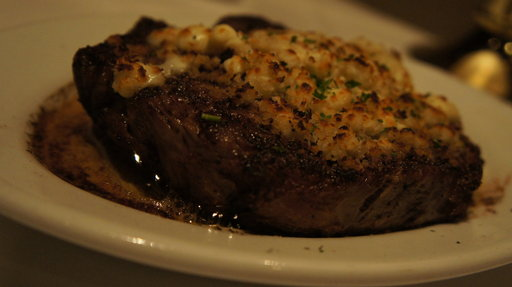

In [ ]:
Image.open(list(Path(train_dir).glob('*/*.jpg'))[33])

# use transforms to augment the images


# goals
* for train_data
1. use Resize
2. use RandomHorizontalFlip
3. use ToTensor

* for test data
1. use Resize
2. ToTensor

In [ ]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize([64,64]),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.ToTensor()

])

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize([64,64]),
    torchvision.transforms.ToTensor()
])

# test your CustomImageFolder

In [ ]:
train_data_custom = CustomImageFolder(directory=train_dir,
                                      transform=train_transform)

test_data_custom = CustomImageFolder(directory=test_dir,
                                     transform=test_transform)



In [ ]:
class_names = train_data_custom.class_names
class_names

['pizza', 'steak', 'sushi']

# exploration, analysis and freethrows

In [ ]:
# checking the len of train_data and len of train_data_custom
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
# checking the len of test_data and test_data_custom
len(test_data),len(test_data_custom)

(75, 75)

In [ ]:
# getting the class_names from custom data
train_data_custom.class_names

['pizza', 'steak', 'sushi']

# plot the random images

In [ ]:
def display_images(dataset,n=3,seed=None):
  # setting the random seed for reproducibility:
  if seed:
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)

  if n%3 != 0:
    n = 3
    print('Please make sure n is a multiple of 3!!')

  rows = int(np.sqrt(n))
  cols = int(np.sqrt(n))
  class_names = dataset.class_names

  for i in range(rows*cols):

    random_index = np.random.randint(0,len(dataset),1)[0]
    image,label = train_data_custom[random_index]

    plt.subplot(rows,cols,i+1)
    plt.imshow(image.permute(1,2,0))
    plt.title(class_names[label])
    plt.axis('off')


  plt.show()

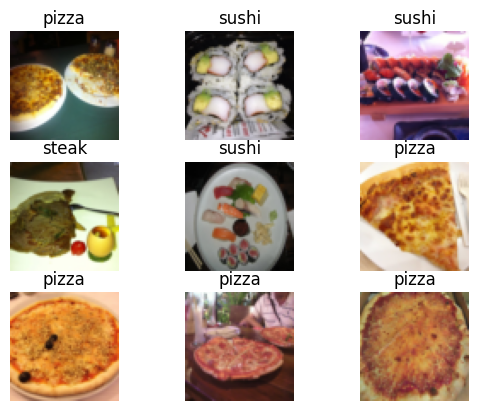

In [ ]:
display_images(train_data_custom,n=9)

# turn the datasets into dataloaders

# goals:
1. Batchify the dataset using DataLoader
2. choose a random image and label from the Dataloader using next(iter()) function.

In [ ]:
# Batchifying the dataset using DataLoader
train_dataloader = torch.utils.data.DataLoader(train_data_custom,
                                               batch_size=8,
                                               shuffle=True,
                                               num_workers=os.cpu_count())

test_dataloader = torch.utils.data.DataLoader(test_data_custom,
                                              batch_size=8,
                                              shuffle=False,
                                              num_workers=os.cpu_count())

In [ ]:
# randomly choosing a batch of images and labels from the DataLoader using next(iter()) function

image_batch,label_batch = next(iter(train_dataloader))

print(image_batch.shape)
print(label_batch.shape)

torch.Size([8, 3, 64, 64])
torch.Size([8])


# TrivialAugmentWide:

* TrivialAugmentWide(num_magnitude_bins=) selects a random transformation to apply on the data from all available transformations or augmentations

In [ ]:
parvathi_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.Resize([224,224]),
    torchvision.transforms.TrivialAugmentWide(num_magnitude_bins=31),
    torchvision.transforms.ToTensor()
])

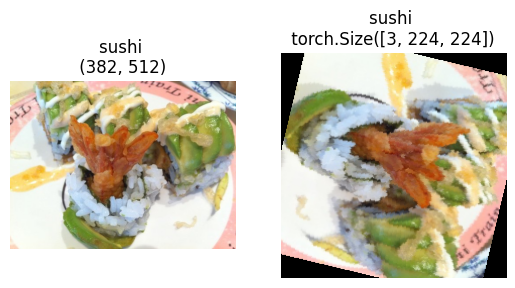

In [ ]:


image_paths = list(image_path.glob('*/*/*.jpg'))
rip = np.random.choice(image_paths)

fig,ax = plt.subplots(1,2)

img = Image.open(rip)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('{} \n {} '.format(rip.parent.stem,(img.height,img.width)))


img1 = parvathi_augmentation(img)
ax[1].imshow(img1.permute(1,2,0))
ax[1].axis('off')
ax[1].set_title('{} \n {} '.format(rip.parent.stem,(img1.shape)))

plt.show()




# Building our model to classify the images.

# goal
1. emulate the TinyVGG model in CNN explainer website.
2. use simple transformations such as resizing and converting to tensor.
3. load the images using either ImageFolder or create your customImageFolder subclass
4. use dataloader to batchify the images.

In [ ]:
# simple transformations
simple_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.Resize([64,64]),
    torchvision.transforms.ToTensor()
])


# load the images using customimagefolder
train_dir = 'data/pizza_steak_sushi/train'
test_dir = 'data/pizza_steak_sushi/test'
train_data_simple = CustomImageFolder(train_dir,
                                       transform=simple_augmentation)

test_data_simple = CustomImageFolder(test_dir,
                                       transform=simple_augmentation)

# batchify the images
train_dataloader_simple = torch.utils.data.DataLoader(train_data_simple,
                                                      batch_size=8,
                                                      shuffle=True,
                                                      num_workers=os.cpu_count())

test_dataloader_simple = torch.utils.data.DataLoader(test_data_simple,
                                                     batch_size=8,
                                                     shuffle=False,
                                                     num_workers=os.cpu_count())

# rewrite the whole thing and emulate the TinyVGG architecture that could be found in CNN explainer website.

# goals:
1. import the essentials.
2. make the directory, store the zipfile and extract the contents of the zipfile.
3. create the preprocessing functions, both simple_augmentation and trivial_augment_wide augmentation.
4. make CustomImageFolder for mapping the preprocessing functions on all images.
5. apply simple_augmentation to each image.
6. batchify the images
7. create the TinyVGG model

# day 245,day 246,day 253

# goals for the next day:
1. try improving the model by adding more layers or tweaking the learning rate or do anything.
2. create a bunch of list and append train_loss, test_loss and so on and plot their curves.


### importing the essentials

In [ ]:
pip install torchinfo

In [ ]:
import numpy as np
import pandas as pd
import torch, torchvision
import os,requests,zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from pathlib import Path
from PIL import Image
import torchinfo
from tqdm.auto import tqdm
import time

### 2. make the directory, store the zipfile and extract the contents of the zipfile.

In [ ]:
# creating the directories.
data_path = Path('data')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
  print('The Directory is already created')
else:
  print('Creating the image_path directory')
  image_path.mkdir(parents=True,exist_ok=True)

# downloading the zipfile
with open(Path(data_path / 'pizza_steak_sushi.zip'),'wb') as f:
  link = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip').content
  f.write(link)

# unzipping the zip file in data_path and extracting the contents to image_path
with zipfile.ZipFile(Path(data_path  / 'pizza_steak_sushi.zip'),'r') as zip:
  zip.extractall(image_path)
  zip.close()


Creating the image_path directory


### 3. create the preprocessing functions, both simple_augmentation and trivial_augment_wide augmentation.

In [ ]:
simple_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=[64,64]),
    torchvision.transforms.ToTensor()

])

taw_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(64,64)),
    torchvision.transforms.TrivialAugmentWide(num_magnitude_bins=31),
    torchvision.transforms.ToTensor()
])

### 4. make CustomImageFolder for mapping the preprocessing functions on all images.

In [ ]:
def find_classes(directory):

  class_names = sorted(os.listdir(directory))

  if not class_names:
    raise FileNotFoundError("The path '{}' seems to be incorrect. please check it!!! ".format(directory))

  class_idx = {class_name:idx for idx,class_name in enumerate(class_names)}

  return class_names,class_idx

class CustomImageFolder(torch.utils.data.Dataset):

  # initialization with useful parameters
  def __init__(self,directory,transform=None):
    self.image_paths = list(Path(directory).glob('*/*.jpg'))
    self.transform = transform
    self.class_names,self.class_idx = find_classes(directory)

  # load image with an index
  def load_image(self,index):
    return Image.open(self.image_paths[index])

  # overwrite the len function
  def __len__(self):
    return len(self.image_paths)

  # overwrite the getitem function
  def __getitem__(self,index):
    img = self.load_image(index)
    class_name = self.image_paths[index].parent.stem
    label = self.class_idx[class_name]

    # if transform parameter was passed use it and return transformed image and label else return ordinary image and label
    if self.transform:
      return self.transform(img), label
    else:
      return img, label


#### exploration,analysis and freethrows

In [ ]:
# seeing how os.scandir works vs os.listdir

list(os.scandir(Path('data/pizza_steak_sushi/train')))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

In [ ]:
os.listdir(Path('data/pizza_steak_sushi/train'))

['pizza', 'sushi', 'steak']

In [ ]:
sorted(os.listdir(Path('data/pizza_steak_sushi/train')))

['pizza', 'steak', 'sushi']

In [ ]:
lis = []

if not lis:
  raise FileNotFoundError("it is empty bitch!!")

FileNotFoundError: ignored

### 5. apply simple_augmentation to each image.

In [ ]:
train_dir = 'data/pizza_steak_sushi/train'
test_dir = 'data/pizza_steak_sushi/test'

train_data_custom = CustomImageFolder(directory=train_dir,
                                      transform=simple_augmentation)

test_data_custom = CustomImageFolder(directory=test_dir,
                                     transform=simple_augmentation)


### 6. Batchify the data

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_data_custom,
                                               batch_size=8,
                                               shuffle=True,
                                               num_workers=os.cpu_count())

test_dataloader = torch.utils.data.DataLoader(test_data_custom,
                                              batch_size=8,
                                              shuffle=False,
                                              num_workers=os.cpu_count())

### 7. create the TinyVGG model

In [ ]:
class TinyVGG(torch.nn.Module):
  def __init__(self,i,o,h):

    super().__init__()

    self.conv_block1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=i,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=(3,3),
                           stride=(1,1))
    )

    self.conv_block2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(in_channels=h,
                        out_channels=h,
                        kernel_size=(3,3),
                        stride=(1,1),
                        padding=(1,1)),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=(3,3),
                           stride=(1,1))
    )

    self.classifier_layer = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features=h*60*60,
                        out_features=o)
    )

  def forward(self,x):
    x = self.conv_block1(x)
    # print(x.shape)
    x = self.conv_block2(x)
    # print(x.shape)
    x = self.classifier_layer(x)
    # print(x.shape)

    return x

# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# model creation
class_names = train_data_custom.class_names
model0 = TinyVGG(i=3,h=20,o=len(class_names)).to(device) # i=# of color channels

#### exploration,analysis and freethrows

In [ ]:
# correcting the hidden layer with the help of error:

img,label = next(iter(train_dataloader))
model0(img.to(device))

torch.Size([8, 10, 62, 62])
torch.Size([8, 10, 60, 60])


RuntimeError: ignored

In [ ]:
# after correction
img,label = next(iter(train_dataloader))
model0(img.to(device))

tensor([[-0.0279,  0.0777,  0.0102],
        [-0.0266,  0.0751,  0.0156],
        [-0.0253,  0.0733,  0.0112],
        [-0.0261,  0.0774,  0.0090],
        [-0.0249,  0.0739,  0.0092],
        [-0.0313,  0.0764,  0.0089],
        [-0.0252,  0.0728,  0.0143],
        [-0.0233,  0.0741,  0.0092]], grad_fn=<AddmmBackward0>)

### 8. get the model summary using torch.info()

In [ ]:
import torchinfo
torchinfo.summary(model0)

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       560
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       3,620
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       3,620
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       3,620
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      216,003
Total params: 227,423
Trainable params: 227,423
Non-trainable params: 0

###9. compiling and fitting the model

In [ ]:
def total_time(start,end):
  total = end - start
  print("Total running TIME is:{:.4f} seconds".format(total))

In [ ]:
# compiling the model:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters())

def accuracy(pred,actual):
  correct = torch.eq(pred,actual).sum().item()
  acc = correct/len(actual)
  return acc


# fitting the model:
torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs = 8

# containers
trl = []
tsl = []
trc = []
tsc = []

start = time.perf_counter()
from tqdm import tqdm
for epoch in tqdm(range(epochs)):

  # initializing the variables:
  a_train_loss,a_train_acc,a_test_loss,a_test_acc = 0,0,0,0

  # training the individual batches
  model0.train()
  for (x_train,y_train) in train_dataloader:

    # putting x_train,y_train be in right device
    x_train,y_train = x_train.to(device), y_train.to(device)

    # get the train_loss and train_acc
    train_logits = model0(x_train)
    train_predictions = train_logits.argmax(dim=1)
    train_pred_prob = torch.max(torch.softmax(train_logits,dim=1),dim=1)
    train_actuals = y_train
    train_loss = loss(train_logits,train_actuals)
    train_acc = accuracy(train_predictions,train_actuals)

    a_train_loss += train_loss
    a_train_acc  += train_acc

    # zero grad the optimizer
    optimizer.zero_grad()

    # backpropogate
    train_loss.backward()

    # step the optimizer up a notch
    optimizer.step()

  # normalize the a_train_loss and a_train_acc
  a_train_loss /= len(train_dataloader)
  a_train_acc /= len(train_dataloader)

  # evaluating
  model0.eval()
  with torch.inference_mode():
    for (x_test,y_test) in test_dataloader:

      # putting x_test and y_test in right devices
      x_test,y_test = x_test.to(device),y_test.to(device)

      # getting test_loss and test_acc
      test_logits = model0(x_test)
      test_predictions = test_logits.argmax(dim=1)
      test_actuals = y_test
      test_loss = loss(test_logits,test_actuals)
      test_accuracy = accuracy(test_predictions,test_actuals)

      a_test_loss += test_loss
      a_test_acc  += test_accuracy

    # normalizing a_test_loss and a_test_acc
    a_test_loss /= len(test_dataloader)
    a_test_acc /= len(test_dataloader)


    # appending things
    trl.append(a_train_loss.detach().numpy())
    tsl.append(a_test_loss.detach().numpy())
    trc.append(a_train_acc)
    tsc.append(a_test_acc)

    # printing the results
    print('Epoch:{} | Train_Loss:{:.3f} , Train_Accuracy:{:3f} |Test_Loss:{:.3f} , Test_Accuracy:{:.3f}'\
          .format(epoch,a_train_loss,a_train_acc,a_test_loss,a_test_acc))

end = time.perf_counter()
total_time(start,end)

 12%|█▎        | 1/8 [00:05<00:35,  5.03s/it]

Epoch:0 | Train_Loss:1.220 , Train_Accuracy:0.336207 |Test_Loss:1.084 , Test_Accuracy:0.375


 25%|██▌       | 2/8 [00:11<00:33,  5.60s/it]

Epoch:1 | Train_Loss:0.996 , Train_Accuracy:0.521552 |Test_Loss:1.339 , Test_Accuracy:0.388


 38%|███▊      | 3/8 [00:16<00:27,  5.60s/it]

Epoch:2 | Train_Loss:0.943 , Train_Accuracy:0.521552 |Test_Loss:1.032 , Test_Accuracy:0.463


 50%|█████     | 4/8 [00:21<00:21,  5.30s/it]

Epoch:3 | Train_Loss:0.874 , Train_Accuracy:0.616379 |Test_Loss:1.043 , Test_Accuracy:0.446


 62%|██████▎   | 5/8 [00:28<00:17,  5.86s/it]

Epoch:4 | Train_Loss:0.827 , Train_Accuracy:0.663793 |Test_Loss:1.071 , Test_Accuracy:0.412


 75%|███████▌  | 6/8 [00:33<00:11,  5.55s/it]

Epoch:5 | Train_Loss:0.741 , Train_Accuracy:0.702586 |Test_Loss:1.152 , Test_Accuracy:0.433


 88%|████████▊ | 7/8 [00:38<00:05,  5.32s/it]

Epoch:6 | Train_Loss:0.675 , Train_Accuracy:0.693966 |Test_Loss:1.258 , Test_Accuracy:0.388


100%|██████████| 8/8 [00:45<00:00,  5.64s/it]

Epoch:7 | Train_Loss:0.649 , Train_Accuracy:0.732759 |Test_Loss:1.620 , Test_Accuracy:0.388
Total running TIME is:45.1321 seconds


### 10. writing a function to see training and test results an plots

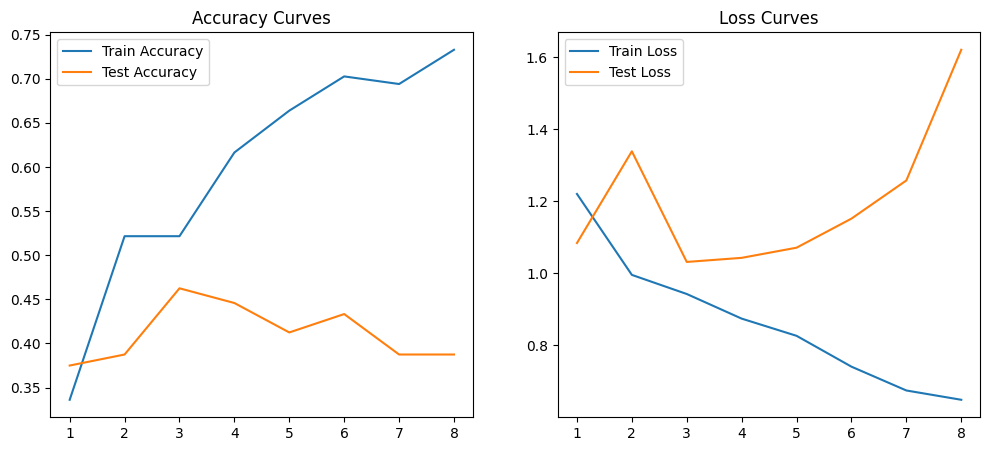

In [ ]:
def plot_results(results):

  train_acc = results['train_acc']
  train_loss = results['train_loss']
  test_acc = results['test_acc']
  test_loss = results['test_loss']
  epochs = np.arange(1,len(train_acc)+1,1)

  fig,ax = plt.subplots(1,2,figsize=(12,5))

  ax[0].plot(epochs,train_acc,label='Train Accuracy')
  ax[0].plot(epochs,test_acc,label='Test Accuracy')
  ax[0].set_title('Accuracy Curves')
  ax[0].legend()

  ax[1].plot(epochs,train_loss,label='Train Loss')
  ax[1].plot(epochs,test_loss,label='Test Loss')
  ax[1].set_title('Loss Curves')
  ax[1].legend()


  plt.show()

results = {'train_acc':trc,'test_acc':tsc,'train_loss':trl,'test_loss':tsl}
plot_results(results)


### 11. ways to deal with overfitting and underfitting:

#### overfitting:
1. get more data
2. use data augmentation techniques.
3. use data regulairization techniques such as l1,l2 regularization.
4. use transfer learning
5. adjust the learning rate by using learning rate scheduler.
6. use early stopping.


#### underfitting:(test accuracy is more than train accuracy)
1. train for longer.
2. use transfer learning models.
3. reduce the magnitude of aumentation and regularizations.
4. add more layers/complexity to the model.

# Build the model1:

### goals:
* do trivial data augmentation to train_data.
* do simple data augmentation to test_data.
* put the train and test data to CutstomImageFolder
* put the train_data and test_data to DataLoader to batchify.
* create the model1 from TinyVGG object.
* compile and fit the model
* record the losses and accuracies and plot them.


In [ ]:
# defining the augmentation methods we are going to use;
taw_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.Resize([64,64]),
    torchvision.transforms.TrivialAugmentWide(num_magnitude_bins=31),
    torchvision.transforms.ToTensor()
])

simple_augmentation = torchvision.transforms.Compose([
    torchvision.transforms.Resize([64,64]),
    torchvision.transforms.ToTensor()
])

# getting train and test data;
train_dir = 'data/pizza_steak_sushi/train'
test_dir = 'data/pizza_steak_sushi/test'
train_data_augmented = CustomImageFolder(train_dir,
                                         transform=taw_augmentation)
test_data_augmented = CustomImageFolder(test_dir,
                                        transform=simple_augmentation)


# batchifying the data;
train_dataloader = torch.utils.data.DataLoader(train_data_augmented,
                                               batch_size=8,
                                               shuffle=True,
                                               num_workers=os.cpu_count())

test_dataloader = torch.utils.data.DataLoader(test_data_augmented,
                                              batch_size=8,
                                              shuffle=False,
                                              num_workers=os.cpu_count())



In [ ]:
# create the model
model1 = TinyVGG(i=3,o=len(train_data_augmented.class_names),h=32).to(device)

# compile the model
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model1.parameters())
def accuracy(actual,prediction):
  correct = torch.eq(actual,prediction).sum().item()
  acc = correct/len(actual)
  return acc

# fit the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10

trl = []
tsl = []
trc = []
tsc = []

start = time.perf_counter()
for epoch in tqdm(range(epochs)):

  a_train_loss,a_train_acc,a_test_loss,a_test_acc = 0,0,0,0

  model1.train()
  for x_train,y_train in train_dataloader:

    # passing x_train and y_train to right device
    x_train,y_train = x_train.to(device),y_train.to(device)

    # train loss and train accuracy
    train_logits = model1(x_train)
    train_predictions = train_logits.argmax(dim=1)
    train_pred_probs = torch.argmax(torch.softmax(train_logits,dim=1),dim=1)
    train_actuals = y_train
    train_loss = loss(train_logits,train_actuals)
    train_acc = accuracy(train_actuals,train_predictions)

    a_train_loss += train_loss
    a_train_acc += train_acc

    # zero grading
    optimizer.zero_grad()

    # back propogate the losses
    train_loss.backward()

    # step the optimizer up a notch
    optimizer.step()

  # normalize the accumulated losses and accuracies
  a_train_loss /= len(train_dataloader)
  a_train_acc /= len(train_dataloader)

  # evaluation time
  model1.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:

      # test loss and test accuracies
      test_logits = model1(x_test)
      test_predictions = test_logits.argmax(dim=1)
      test_pred_probs = torch.argmax(torch.softmax(test_logits,dim=1),dim=1)
      test_actuals = y_test
      test_loss = loss(test_logits,test_actuals)
      test_acc = accuracy(test_actuals,test_predictions)

      a_test_loss += test_loss
      a_test_acc += test_acc

    # normalizing the accumulated test losses and accuracies
    a_test_loss /= len(test_dataloader)
    a_test_acc /= len(test_dataloader)

    # filling the containers
    trl.append(a_train_loss.detach().numpy())
    tsl.append(a_test_loss.detach().numpy())
    trc.append(a_train_acc)
    tsc.append(a_test_acc)

    # printing the results
    print('Epoch:{} | Train_Loss:{:.3f} , Train_Accuracy:{:3f} |Test_Loss:{:.3f} , Test_Accuracy:{:.3f}'\
          .format(epoch,a_train_loss,a_train_acc,a_test_loss,a_test_acc))

end = time.perf_counter()

total_time(start,end)

 10%|█         | 1/10 [00:10<01:31, 10.15s/it]

Epoch:0 | Train_Loss:1.208 , Train_Accuracy:0.323276 |Test_Loss:1.098 , Test_Accuracy:0.329


 20%|██        | 2/10 [00:20<01:24, 10.51s/it]

Epoch:1 | Train_Loss:1.083 , Train_Accuracy:0.366379 |Test_Loss:1.294 , Test_Accuracy:0.338


 30%|███       | 3/10 [00:30<01:11, 10.16s/it]

Epoch:2 | Train_Loss:1.078 , Train_Accuracy:0.474138 |Test_Loss:1.060 , Test_Accuracy:0.371


 40%|████      | 4/10 [00:40<00:59,  9.87s/it]

Epoch:3 | Train_Loss:0.981 , Train_Accuracy:0.435345 |Test_Loss:0.998 , Test_Accuracy:0.483


 50%|█████     | 5/10 [00:47<00:44,  8.94s/it]

Epoch:4 | Train_Loss:0.913 , Train_Accuracy:0.560345 |Test_Loss:1.031 , Test_Accuracy:0.463


 60%|██████    | 6/10 [00:56<00:36,  9.02s/it]

Epoch:5 | Train_Loss:0.944 , Train_Accuracy:0.530172 |Test_Loss:1.036 , Test_Accuracy:0.346


 70%|███████   | 7/10 [01:03<00:25,  8.40s/it]

Epoch:6 | Train_Loss:0.963 , Train_Accuracy:0.594828 |Test_Loss:0.989 , Test_Accuracy:0.521


 80%|████████  | 8/10 [01:13<00:17,  8.80s/it]

Epoch:7 | Train_Loss:0.926 , Train_Accuracy:0.594828 |Test_Loss:1.042 , Test_Accuracy:0.408


 90%|█████████ | 9/10 [01:21<00:08,  8.55s/it]

Epoch:8 | Train_Loss:0.950 , Train_Accuracy:0.594828 |Test_Loss:0.974 , Test_Accuracy:0.496


100%|██████████| 10/10 [01:29<00:00,  8.98s/it]

Epoch:9 | Train_Loss:0.928 , Train_Accuracy:0.547414 |Test_Loss:0.985 , Test_Accuracy:0.471
Total running TIME is:89.8338 seconds


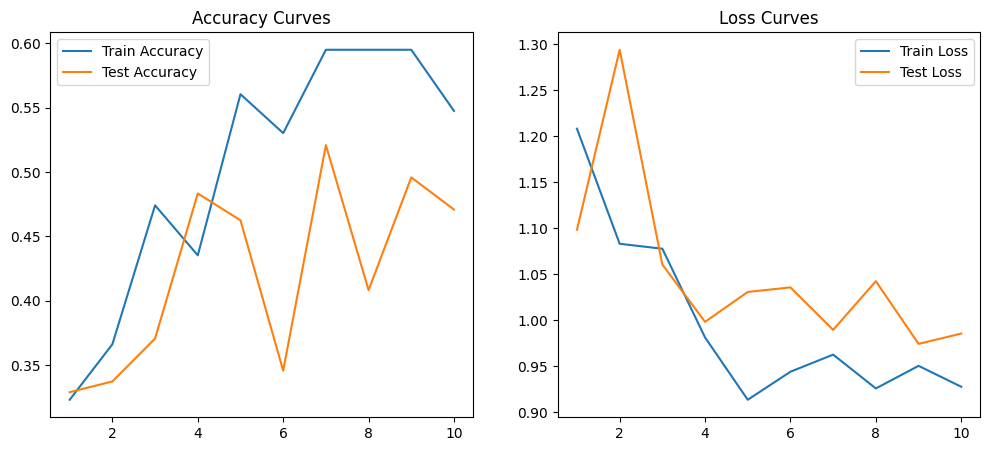

In [ ]:
# plot the curves
results1 = {'train_acc':trc,'test_acc':tsc,'train_loss':trl,'test_loss':tsl}
plot_results(results1)

# downloading a custom_image and making predictions on it

# goals:
1. make a folder for storing the downloaded custom images.
2. download the image using requests.get('url').content.
3. write that image to that file.
4. see the image.

In [ ]:
# make a folder for storing the downloaded custome images
custom_image_paths = Path('Custom_Images')

custom_image_paths.mkdir(parents=True,exist_ok=True)

# downloading the image from internet
with open(Path(custom_image_paths / 'pizza.jpg'),'wb') as f:
  link = requests.get('https://img.freepik.com/free-photo/top-view-pepperoni-pizza-with-mushroom-sausages-bell-pepper-olive-corn-black-wooden_141793-2158.jpg').content
  f.write(link)

# see how the image looks.

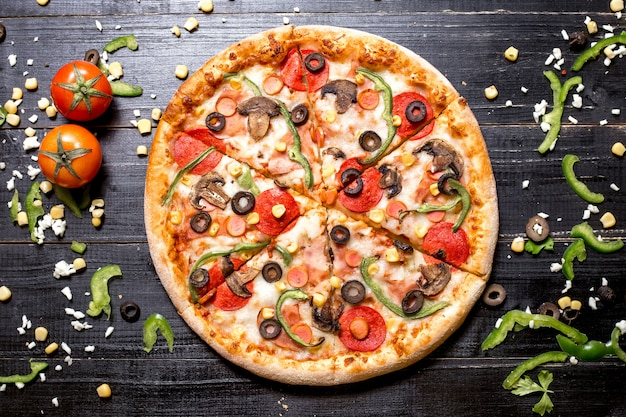

In [ ]:
# see how the image looks

Image.open(Path(custom_image_paths / 'pizza.jpg'))

# load and preprocess the downloaded image

# goal:
1. convert the image into a tensor using torch.io.read_image
2. preprocess the image to suit the model's requirments:
* convert it into a tensor.
* resize it.
* change the datatype of the image to torch.float32.


In [ ]:
# read the image as tensor
image_paths = list(custom_image_paths.glob('*.jpg'))

# random index
random_index = np.random.randint(len(image_paths))

# convert the image to tensor, change the type torch.float32, and normalize it by 255.
image = torchvision.io.read_image(str(image_paths[random_index])).type(torch.float32)/255.

# resize the image
preprocess_custom_img = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=[64,64])
])


image = preprocess_custom_img(image)


# add a batch dimension to the image for the model to accept this outsider:
image = image.unsqueeze(dim=0)

image

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[[[0.3718, 0.4151, 0.4358,  ..., 0.1159, 0.8863, 0.8815],
          [0.3243, 0.3131, 0.3298,  ..., 0.1349, 0.2429, 0.4628],
          [0.3066, 0.1901, 0.1789,  ..., 0.2060, 0.2427, 0.6064],
          ...,
          [0.0969, 0.1495, 0.0957,  ..., 0.0368, 0.0750, 0.0303],
          [0.1111, 0.1278, 0.1139,  ..., 0.0194, 0.0332, 0.0371],
          [0.0679, 0.0789, 0.0697,  ..., 0.0151, 0.0642, 0.1199]],

         [[0.3796, 0.4190, 0.4393,  ..., 0.1081, 0.8258, 0.8100],
          [0.3243, 0.3053, 0.3247,  ..., 0.1233, 0.1836, 0.3913],
          [0.2710, 0.1551, 0.1470,  ..., 0.1853, 0.2034, 0.5818],
          ...,
          [0.0733, 0.1260, 0.0800,  ..., 0.0329, 0.0593, 0.0146],
          [0.0915, 0.1082, 0.0943,  ..., 0.0115, 0.0293, 0.0214],
          [0.0483, 0.0593, 0.0579,  ..., 0.0073, 0.0544, 0.1003]],

         [[0.4385, 0.4896, 0.5099,  ..., 0.1277, 0.6728, 0.6386],
          [0.3714, 0.3545, 0.3783,  ..., 0.1423, 0.0834, 0.2433],
          [0.2790, 0.1571, 0.1348,  ..., 0

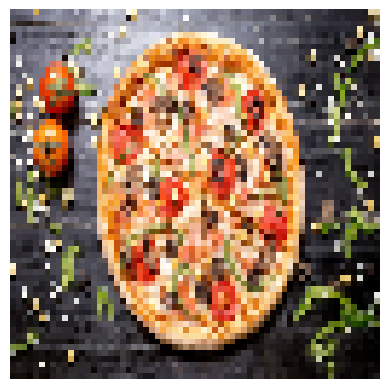

In [ ]:
# see how the image turned out!
plt.imshow(image.squeeze().permute(1,2,0))
plt.axis('off')
plt.show()

In [ ]:
# make prediction with the image

model1.eval()
with torch.inference_mode():
  logit = model1(image)
  prediction = logit.argmax(dim=1).cpu()
  pred_prob = torch.max(torch.softmax(logit,dim=1))

print("our model's prediction is: {}".format (class_names[prediction]))
print("with the probability of: {:.2f}%%".format(pred_prob*100))

our model's prediction is: pizza
with the probability of: 55.74%%


In [ ]:
# functionize the whole process:

def predict(url,model):
  image_path = Path('custom_images')
  image_path.mkdir(parents=True,exist_ok=True)

  with open(Path(image_path / 'image.jpg')) as f:
    link = requests.get(url).content
    f.write(link)

  # reading the image
  image = torch.io.read_image(str(Path(image_path / 'image.jpg'))).type(torch.float32)/255.

  # resizing the image
  resize = torchvision.transforms.Compose([
      torchvision.transforms.Resize(size=[64,64])
  ])

  image = resize(image)

  # add an extra dimension for batch
  image = image.unsqueeze(0)

  # put the model on the right device
  model.to(device)

  # make prediction on the image
  model.eval()
  with torch.inference_mode():
    logit = model(image)
    prediction = logit.argmax(dim=1).cpu()
    pred_prob = torch.max(torch.softmax(logit,dim=1))

  # plot the image with prediction label
  class_names = model.class_names
  Image.open(Path(image_path / 'image.jpg'))
  print('Prediction is:{} '.format(class_names[prediction]))
  print('with probability: {:.2f}'.format(pred_prob))




